In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
import string
import re
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Datasets/updated_data.csv",encoding="latin1")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df.head()

,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,2019-01-01,5,Dove Menâs + Deodorant,"As you get older, you know what you like and w...",True
1,1,2019-01-02,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2,2019-01-02,4,Vitamin B12.,Excellent,True
3,3,2019-01-02,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,4,2019-01-02,5,Very handy,Does what is says it does,False


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.info()

In [7]:
duplicates = df.duplicated().sum()
print(duplicates)

783


In [8]:
df= df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1650 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


In [9]:
df.isnull().sum()

review_date           0
review_rating         0
review_title         68
review_text           0
verified_purchase     0
dtype: int64

In [10]:
df.drop(["review_title","review_date"], axis=1, inplace=True)
df.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


EDA on Review Text

In [11]:
df['total_words'] = df['review_text'].apply(lambda i:len(str(i).split(" ")))

df['total_characters'] = df['review_text'].str.len()

sw = set(stopwords.words('english'))
df['total_stopwords'] =  df['review_text'].str.split().apply(lambda i: len(set(i) & sw))

count_punctuations = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total_punctuations']= df.review_text.apply(lambda p: count_punctuations(p, string.punctuation))

df['total_uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len()


In [12]:
df.head()

,review_rating,review_text,verified_purchase,total_words,total_characters,total_stopwords,total_punctuations,total_uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


In [13]:
df.describe()

,review_rating,total_words,total_characters,total_stopwords,total_punctuations,total_uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.198487,178.011641,9.257276,4.428405,3.710128
std,1.123083,35.251879,189.903638,8.537092,5.178620,4.209264
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,115.000000,7.000000,3.000000,2.000000
75%,5.000000,50.000000,268.750000,15.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,48.000000,42.000000,54.000000


In [14]:
print(df.groupby("verified_purchase").describe()) 

                  review_rating                                               \
                          count      mean       std  min  25%  50%  75%  max   
verified_purchase                                                              
False                     900.0  4.315556  1.187805  1.0  4.0  5.0  5.0  5.0   
True                      818.0  4.580685  1.030249  1.0  5.0  5.0  5.0  5.0   

                  total_words                                               \
                        count       mean        std  min   25%   50%   75%   
verified_purchase                                                            
False                   900.0  50.271111  36.854098  1.0  23.0  48.0  63.0   
True                    818.0  14.414425  21.041211  1.0   3.0   8.0  17.0   

                         total_characters                               \
                     max            count        mean         std  min   
verified_purchase                                           

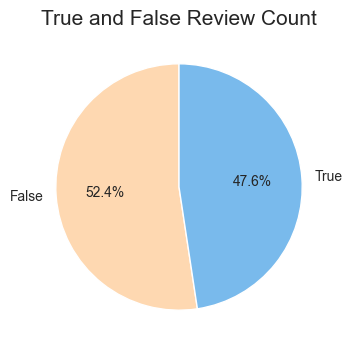

In [15]:
colors = ['#FED8B1','#79BAEC']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors , labels=label.index, autopct='%1.1f%%',startangle=90)
plt.title('True and False Review Count',fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Review Rating Grouped by Verified Purchase')

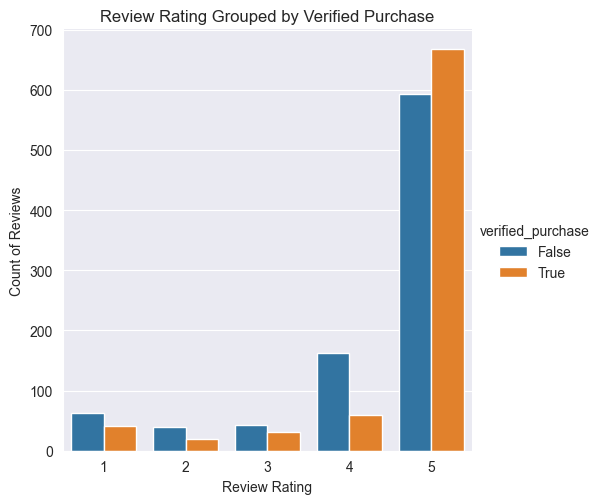

In [16]:
sns.catplot(x="review_rating",kind="count",hue="verified_purchase",data=df)
plt.xlabel("Review Rating")
plt.ylabel("Count of Reviews")
plt.title("Review Rating Grouped by Verified Purchase")

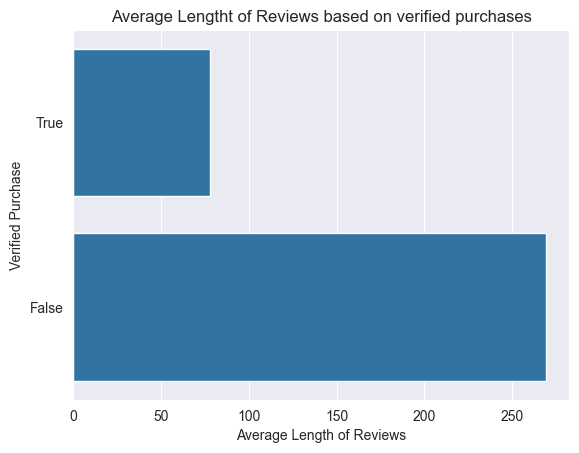

In [18]:
cols =["verified_purchase","review_text"]
vprt = df[cols]

checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]

false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

x=[true_average_length,false_average_length]
y = ["True", "False"]
sns.barplot(x=x,y=y)
plt.xlabel("Average Length of Reviews")
plt.ylabel("Verified Purchase")
plt.title("Average Lengtht of Reviews based on verified purchases")
plt.show()





PREPROCESSING

In [20]:
df.drop(["total_words","total_characters",
         "total_stopwords","total_punctuations",
         "total_uppercases","review_rating"], axis=1, inplace=True)
df.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


Text Preprocessing

In [22]:
df.review_text.apply(lambda i :''.join(TextBlob(i).correct()))

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
5                             Excellent item.Good for men
6                              Thank you Ofm very happy
7                                               Beautiful
8                                 Always buy. Fig bottles
9       Always use this product on my heavily mistreat...
10                                            Great value
11      Tos not the one in the picture, but gets 5 s...
12      Stem as described, excellent quality, rapid de...
13             Good body wash but not a very strong smell
14                                                  Great
15                                              North it!
16      I remember trying this at a friends house year...
17            

In [23]:
def text_processing(text):
    removed_special_characters = re.sub("[^a-zA-Z]"," ",str(text))
    tokens = removed_special_characters.lower().split()

    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []

    for token in tokens:
        if token not in sw:
            cleaned.append(token)

    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)


In [24]:
df["review_text"] = df["review_text"].apply(text_processing)

In [25]:
df["review_text"].head()

0    get older know like suitabl bodi like dove pro...
1    three gigant marmit jar last probabl whole lif...
2                                                excel
3                          great flavour top slow cook
4                                                  say
Name: review_text, dtype: object

In [26]:
r = pd.Series(' '.join(df["review_text"]).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
accident     1
chuck        1
emigr        1
salt         1
mushroom     1
fli          1
cult         1
revitalis    1
advantag     1
tendon       1
Name: count, dtype: int64


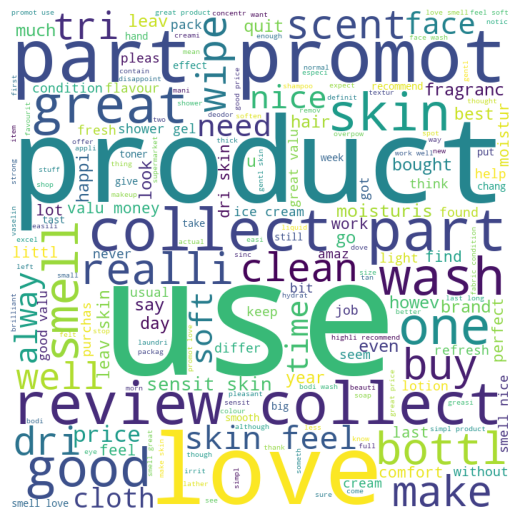

In [27]:
words =""
for i in df["review_text"]:
    tokens = i.split()
    words += " ".join(tokens) + " "

word_cloud = WordCloud(width=700, height=700,background_color='white',min_font_size=10).generate(words)
plt.figure(figsize=(5,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [29]:
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))


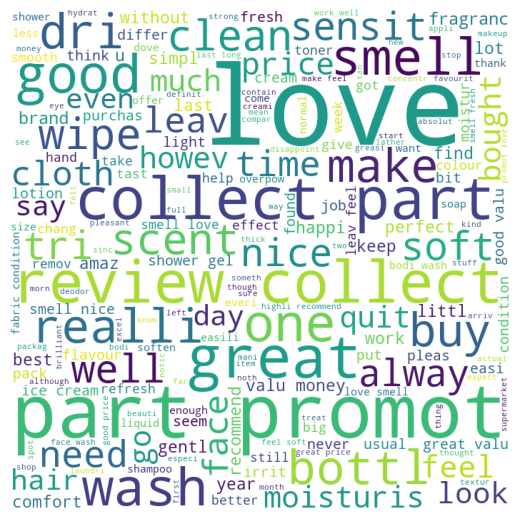

In [30]:
words = ''
for i in df["review_text"]:
    tokens = i.split()
    words += " ".join(tokens)+" "

word_cloud = WordCloud(width=700, height=700,background_color="white",min_font_size = 10).generate(words)
plt.figure(figsize=(5,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
df['review_text'].apply(word_tokenize).head()

0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, marmit, jar, last, probabl, wh...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [32]:
df.to_csv('Datasets/cleaned_data.csv')